In [178]:
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from latex import set_size

plt.style.use("tex")
sns.set_palette("colorblind")

datadir = "../data/"
figdir = "../figures/"

beta = 1.66e-11

In [179]:
def find_maximums(da, intervals):
    maximums = []
    for interval in intervals:
        da_sel = da.sel(time=slice(interval[0], interval[1]))
        maximum = da_sel.where(da_sel==da_sel.max(), drop=True).squeeze()
        maximums.append(maximum)
    return maximums

def slope(x1, x2):
    return (x1.x - x2.x)/(x1.time - x2.time)

In [180]:
data = xr.open_dataset(datadir + "h_beta.nc")
data

<xarray.Dataset>
Dimensions:  (time: 121, x: 300, y: 300)
Coordinates:
  * x        (x) float64 -3.488e+06 -3.465e+06 ... 3.465e+06 3.488e+06
  * y        (y) float64 -4.072e+06 -4.048e+06 ... 2.882e+06 2.905e+06
  * time     (time) float64 0.0 6.0 12.0 18.0 24.0 ... 702.0 708.0 714.0 720.0
Data variables:
    h        (time, y, x) float32 ...
Attributes:
    About:    Created by StVenant shallow water model. Laurent Brodeau, 2013

<xarray.DataArray ()>
array(4.62105699)
Coordinates:
    y        float64 1.167e+04


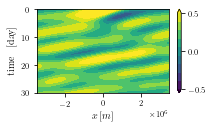

In [181]:
eq = data.sel(y=0, method="nearest")

#maximums = eq.max(dim)

intervals = [
            [1, 100],
            [100, 200]
            ]
maximums = find_maximums(eq, intervals)

group_velocity = slope(maximums[1], maximums[0])/60/60
print(group_velocity)

fig, ax = plt.subplots(1, 1, figsize=set_size(width=221))

levels = np.linspace(-0.5, 0.5, 10)
ticks = [levels[0], 0, levels[-1]]

c = ax.contourf(eq.x, eq.time/24, eq.h,
               levels=levels,
                extend="both"
               )
#ax.plot(maximums[0].x, maximums[0].time, "o", color="black")
#ax.plot(maximums[1].x, maximums[1].time, "o", color="black")
ax.set_xlabel(r"$x \, [m]$")
ax.set_ylabel(r"time \, [day]")

fig.colorbar(c, ticks=ticks)
ax.invert_yaxis()

fig.tight_layout()
fig.savefig(figdir + "beta.pdf", bbox_inches="tight", dpi=600)

In [167]:
f0 = 1e-4
beta = 1.66e-11
D0 = 4000
print(beta*D0/f0)


0.000664
